# 911 Calls Capstone Project

I have analysed 911 calls data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

I have done some modifications in dataset to make it suitable for EDA.
* Converted lat,lng,zip columns to numerical format.
* I have not used all the entries from the original dataset.

## Data and Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('911.csv')

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** Get general info of dataset and check for null values **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## EDA

** Top 5 zipcodes for 911 calls **

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Top 5 townships (twp) for 911 calls **

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Number of unique values in 'title' of emergency **

In [7]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [8]:
df['Reason']=df['title'].apply(lambda x: x.split(':')[0])
df['title']=df['title'].apply(lambda x: x.split(':')[1])

In [9]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [10]:
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [11]:
df['title'].nunique()

81

** So, there are 3 unique Reasons and 81 unique titles for emergency.**

** Most common Reason for a 911 call **

In [12]:
df['Reason'].value_counts().head(5)

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

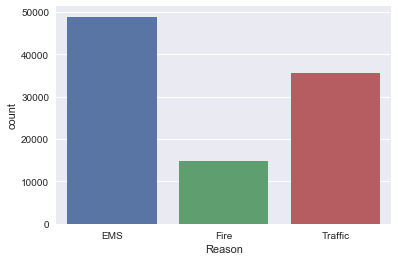

In [13]:
sns.countplot(x=df['Reason'])

** Top 5 titles of emergency calls. **

In [14]:
df['title'].value_counts()[:5]

 VEHICLE ACCIDENT -       23066
 DISABLED VEHICLE -        7702
 VEHICLE ACCIDENT          5573
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
Name: title, dtype: int64

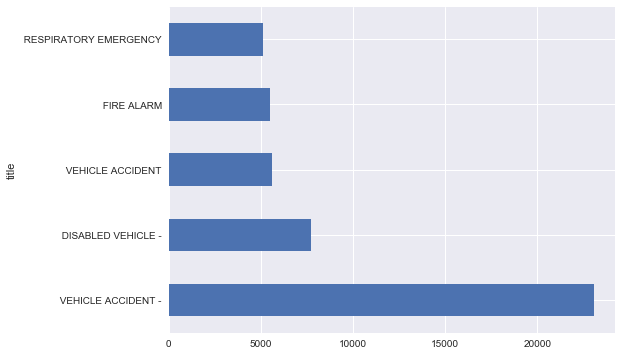

In [15]:
plt.figure(figsize=(8,6))
df.groupby('title').count().sort_values('e',ascending=0)[:5]['e'].plot(kind='barh')

** Plot of top 5 townships calling 911**

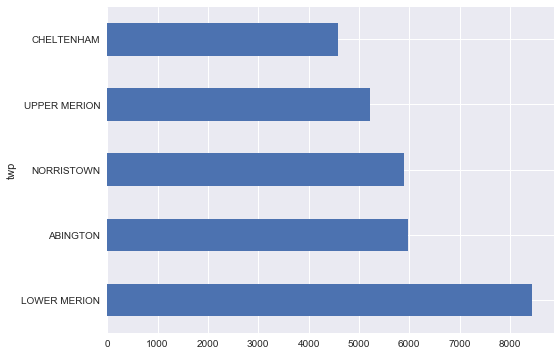

In [16]:
plt.figure(figsize=(8,6))
df.groupby('twp').count().sort_values('e',ascending=0)[:5]['e'].plot(kind='barh')

**Plot of top 5 townships with reasons**

In [17]:
l=list(df['twp'].value_counts()[:5].index)

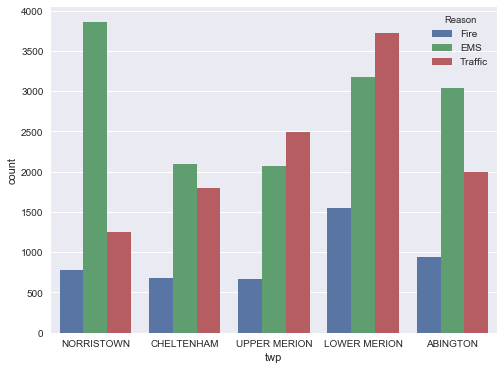

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data=df[df['twp'].apply(lambda x:(True if x in l else False))],x='twp',hue='Reason')

** 'timeStamp' column is in str format. So converted it to TimeStamp format.**

In [19]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Created new columns Hour, Month,Day of week and Date from timeStamp column. **

In [20]:
df['Hour']=df['timeStamp'].apply(lambda x: x.hour)

In [21]:
df['Month']=df['timeStamp'].apply(lambda x:x.month)

In [22]:
df['Day of Week']=df['timeStamp'].apply(lambda x: x.dayofweek)


In [23]:
df['Date']=df['timeStamp'].apply(lambda x: x.date())

In [24]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,2015-12-10


**Coverting 'Day of Week' from numbers to words**

In [25]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [26]:
df['Day of Week']=df['Day of Week'].map(dmap)

In [27]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


** Countplot of the Day of Week column with the hue of the Reason column. **

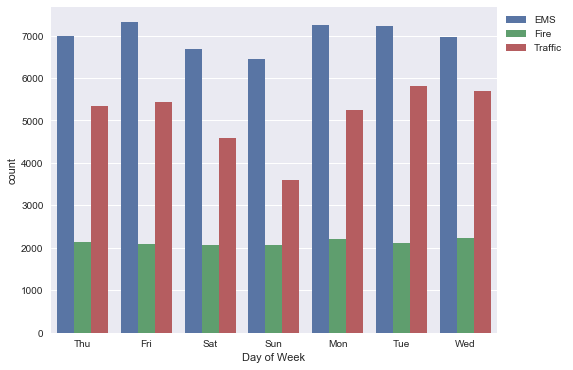

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x='Day of Week',data=df,hue='Reason')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

From above chart, it can be seen that number of emergencies are least on Sundays especially the 'Traffic' kind of emergencies.

** Countplot of the Day of Week column with the hue of the Reason column. **

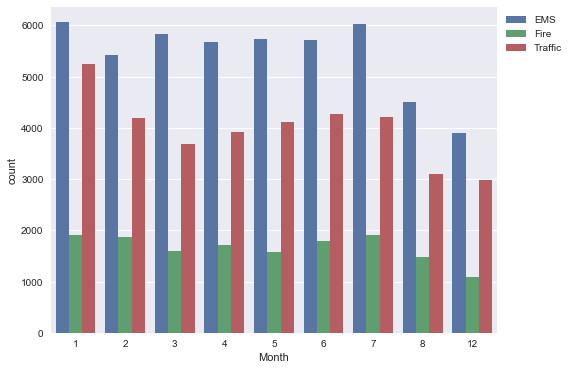

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

** There is something strange in this plot. 9, 10 and 11th months are missing from the data.
I tired using groupby method and lineplot to get rough estimate of the missing months **

In [30]:
a=df.groupby(df['Month']).count()
a.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
Month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423


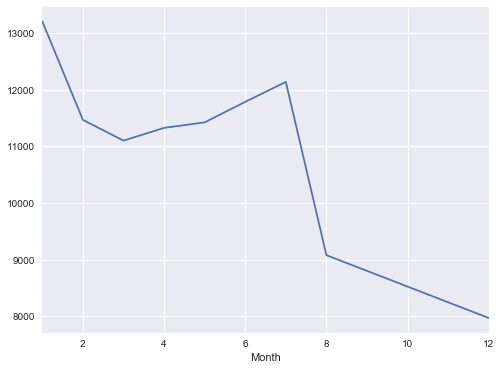

In [31]:
plt.figure(figsize=(8,6))
a['e'].plot()

From above plot as well as the bar graph, it can be seen that number of calls are decreasing towrands year-end and are least in December.

** Using seaborn's lmplot() to create a linear fit on the number of calls per month.**

In [39]:
a.drop('Month',axis=1,inplace=True)
a.reset_index(inplace=True)
a.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


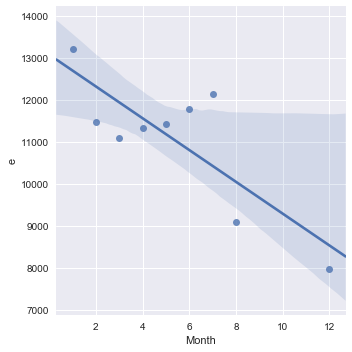

In [40]:
sns.lmplot(x='Month',y='e',data=a)

** Plotting 911 call counts 'Date' column**

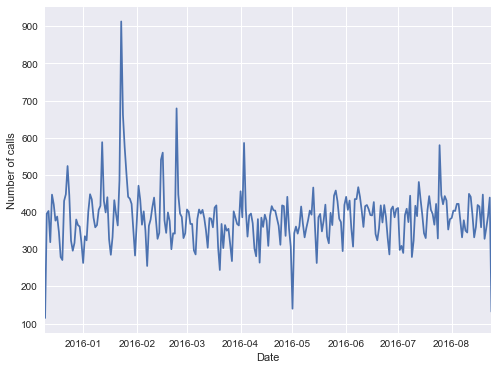

In [41]:
plt.figure(figsize=(8,6))
bydate=df.groupby('Date').count()
bydate['e'].plot()
plt.ylabel('Number of calls')

** Recreated above plot as 3 separate plots with each plot representing a Reason for the 911 call**

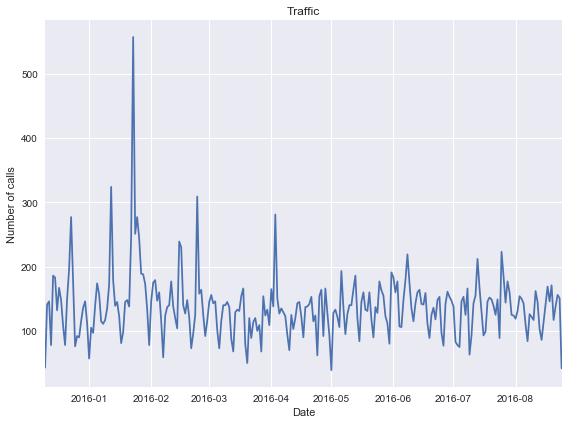

In [42]:
plt.figure(figsize=(8,6))
df[df['Reason']=='Traffic'].groupby('Date').count()['e'].plot()
plt.title('Traffic')
plt.ylabel('Number of calls')
plt.tight_layout()

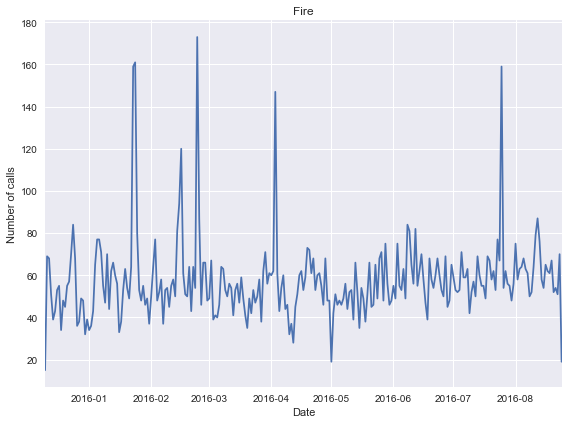

In [43]:
plt.figure(figsize=(8,6))
df[df['Reason']=='Fire'].groupby('Date').count()['e'].plot()
plt.title('Fire')
plt.ylabel('Number of calls')
plt.tight_layout()

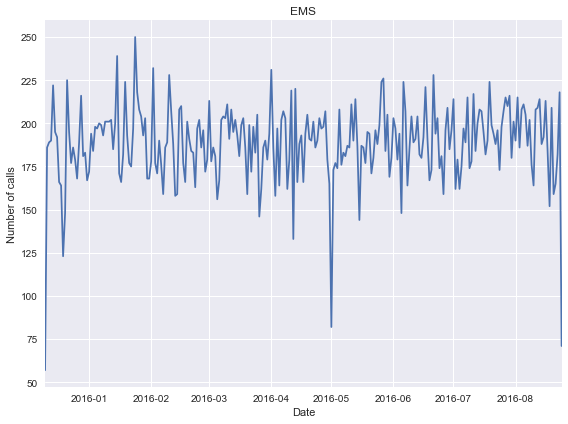

In [44]:
plt.figure(figsize=(8,6))
df[df['Reason']=='EMS'].groupby('Date').count()['e'].plot()
plt.title('EMS')
plt.ylabel('Number of calls')
plt.tight_layout()

** Created a heatmap of 'Day of Week','Hour' and count of 911 calls.**

In [45]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['e'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


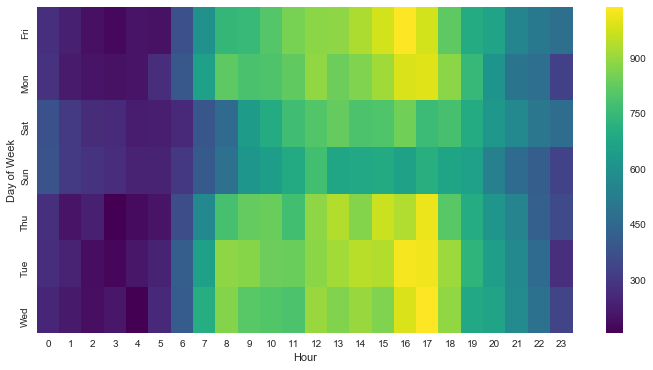

In [46]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

From above heatmap, it becomes easy to get idea how 911 calls are distributed among 'Hours' and 'Day of Week'. Call count is high in the evening esp, at 17th hour. Also, weekends show less call counts than weekdays.

** Created a clustermap using above dataframe so that similat patches of heatmap are arranged together. **

C:\Users\dbda\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


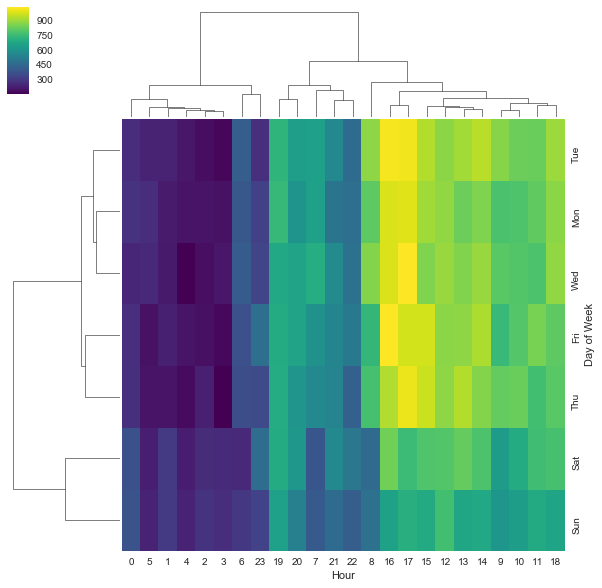

In [47]:
sns.clustermap(dayHour,cmap='viridis')